In [32]:
import os
import json
import pandas as pd
from pathlib import Path
import numpy as np

In [33]:
def get_stats(stats_json):
    with open(stats_json) as f:
        stats = json.load(f)
    return stats

In [34]:
# root_dir = Path('/h/suo/dev/tree-search-planning/muzero-general/out')
root_dir = Path('/h/suo/dev/tree-search-planning/out')

In [73]:
evaluations = []
for env in os.listdir(root_dir):
    if not (root_dir / env).is_dir():
            continue

    for model in os.listdir(root_dir / env):
        for run in os.listdir(root_dir / env / model):
            try:
                stats_json = next((root_dir / env / model / run).glob('*.stats.json'))
                evaluations.append([env, model, run, stats_json])
            except:
                pass

In [74]:
evaluations_df = pd.DataFrame(evaluations, columns=['env', 'model', 'run', 'stats_json'])
evaluations_df['stats_dict'] = evaluations_df['stats_json'].apply(get_stats)
evaluations_df

,env,model,run,stats_json,stats_dict
0,highway-v0,MuZero,run_20210408-065305_25133,/h/suo/dev/tree-search-planning/out/highway-v0...,"{'initial_reset_timestamp': 1617879186.096059,..."
1,HighwayEnv,MDPGapEAgent,baseline_20210410-084339_51988,/h/suo/dev/tree-search-planning/out/HighwayEnv...,"{'initial_reset_timestamp': 1618058619.609562,..."
2,HighwayEnv,MDPGapEAgent,baseline_20210414-082247_38849,/h/suo/dev/tree-search-planning/out/HighwayEnv...,{'initial_reset_timestamp': 1618402967.0445936...
3,HighwayEnv,MDPGapEAgent,baseline_20210410-084630_25529,/h/suo/dev/tree-search-planning/out/HighwayEnv...,"{'initial_reset_timestamp': 1618058790.161311,..."
4,HighwayEnv,DeterministicPlannerAgent,opd_20210410-084339_51989,/h/suo/dev/tree-search-planning/out/HighwayEnv...,{'initial_reset_timestamp': 1618058619.6110404...
5,HighwayEnv,DeterministicPlannerAgent,opd_20210414-082246_38851,/h/suo/dev/tree-search-planning/out/HighwayEnv...,{'initial_reset_timestamp': 1618402966.9857082...
6,HighwayEnv,DeterministicPlannerAgent,opd_20210410-084629_25530,/h/suo/dev/tree-search-planning/out/HighwayEnv...,"{'initial_reset_timestamp': 1618058790.08241, ..."
7,HighwayEnv,MCTSAgent,budget_25_20210414-084512_3774,/h/suo/dev/tree-search-planning/out/HighwayEnv...,{'initial_reset_timestamp': 1618404312.0606859...
8,HighwayEnv,MCTSAgent,budget_25_20210414-082246_38854,/h/suo/dev/tree-search-planning/out/HighwayEnv...,"{'initial_reset_timestamp': 1618402966.984263,..."
9,HighwayEnv,MCTSAgent,iterations10_20210410-080832_7057,/h/suo/dev/tree-search-planning/out/HighwayEnv...,{'initial_reset_timestamp': 1618056512.0742393...


In [76]:
evaluations_df = evaluations_df[evaluations_df['model'] == 'DeterministicPlannerAgent']

In [85]:
np.std([ep[-1] for ep in evaluations_df.iloc[-1].stats_dict['episode_num_goals_reached']])

0.79724525711979

In [77]:
# def mean_episode_length(stat_dict):
#     return np.mean(stat_dict['episode_lengths'])
def mean_total_reward(stat_dict):
    return np.mean(stat_dict['episode_rewards'])
def std_total_reward(stat_dict):
    return np.std(stat_dict['episode_rewards'])
def p_crashed(stat_dict):
    ep_crashed = [int(any(ep)) for ep in stat_dict['episode_crashed']]
    return np.mean(ep_crashed)
def mean_speed(stat_dict):
    ep_speed = [np.mean(ep) for ep in stat_dict['episode_speed']]
    return np.mean(ep_speed)
def std_speed(stat_dict):
    ep_speed = [np.mean(ep) for ep in stat_dict['episode_speed']]
    return np.std(ep_speed)

In [45]:
# evaluations_df['mean_episode_length'] = evaluations_df['stats_dict'].apply(mean_episode_length)
evaluations_df['mean_episode_reward'] = evaluations_df['stats_dict'].apply(mean_total_reward)
evaluations_df['std_episode_reward'] = evaluations_df['stats_dict'].apply(std_total_reward)
evaluations_df['p_crashed'] = evaluations_df['stats_dict'].apply(p_crashed)
evaluations_df['mean_speed'] = evaluations_df['stats_dict'].apply(mean_speed)
evaluations_df['std_speed'] = evaluations_df['stats_dict'].apply(std_speed)

/h/suo/software/miniconda3/envs/treesearch/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/h/suo/software/miniconda3/envs/treesearch/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/h/suo/software/miniconda3/envs/treesearch/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

In [46]:
evaluations_df

,env,model,run,stats_json,stats_dict,mean_episode_reward,std_episode_reward,p_crashed,mean_speed,std_speed
4,HighwayEnv,DeterministicPlannerAgent,opd_20210410-084339_51989,/h/suo/dev/tree-search-planning/out/HighwayEnv...,{'initial_reset_timestamp': 1618058619.6110404...,28.462643,12.273579,0.56,29.091645,1.301806
5,HighwayEnv,DeterministicPlannerAgent,opd_20210414-082246_38851,/h/suo/dev/tree-search-planning/out/HighwayEnv...,{'initial_reset_timestamp': 1618402966.9857082...,30.106324,10.700825,0.50,29.262823,0.736795
6,HighwayEnv,DeterministicPlannerAgent,opd_20210410-084629_25530,/h/suo/dev/tree-search-planning/out/HighwayEnv...,"{'initial_reset_timestamp': 1618058790.08241, ...",29.071658,12.209687,0.48,29.106942,1.199644
22,RoundaboutEnv,DeterministicPlannerAgent,opd_20210414-202247_15783,/h/suo/dev/tree-search-planning/out/Roundabout...,{'initial_reset_timestamp': 1618446167.5847013...,11.944800,1.905292,0.08,14.491519,1.156768
23,RoundaboutEnv,DeterministicPlannerAgent,opd_20210414-195959_8111,/h/suo/dev/tree-search-planning/out/Roundabout...,{'initial_reset_timestamp': 1618444799.5045815...,10.304138,1.390159,0.10,14.234819,1.415374


In [48]:
evaluations_df.set_index(['env', 'model'])[['mean_episode_reward', 'std_episode_reward', 'p_crashed', 'mean_speed', 'std_speed']]

mean_episode_reward  \
env           model                                            
HighwayEnv    DeterministicPlannerAgent            28.462643   
              DeterministicPlannerAgent            30.106324   
              DeterministicPlannerAgent            29.071658   
RoundaboutEnv DeterministicPlannerAgent            11.944800   
              DeterministicPlannerAgent            10.304138   

                                         std_episode_reward  p_crashed  \
env           model                                                      
HighwayEnv    DeterministicPlannerAgent           12.273579       0.56   
              DeterministicPlannerAgent           10.700825       0.50   
              DeterministicPlannerAgent           12.209687       0.48   
RoundaboutEnv DeterministicPlannerAgent            1.905292       0.08   
              DeterministicPlannerAgent            1.390159       0.10   

                                         mean_speed  std_speed  
env           model                                             
HighwayEnv    DeterministicPlannerAgent   29.091645   1.301806  
              DeterministicPlannerAgent   29.262823   0.736795  
              DeterministicPlannerAgent   29.106942   1.199644  
RoundaboutEnv DeterministicPlannerAgent   14.491519   1.156768  
              DeterministicPlannerAgent   14.234819   1.415374

<AxesSubplot:xlabel='model'>

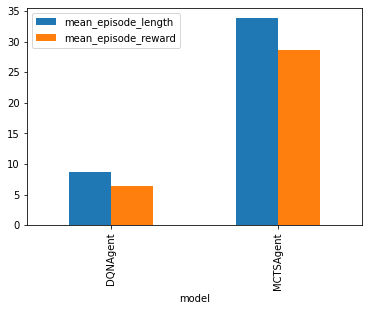

In [126]:
evaluations_df[evaluations_df['env'] == 'HighwayEnv'].groupby('model').mean().plot.bar()